<a href="https://colab.research.google.com/gist/annadwim/55e6df8d5461dd23c8ab67553cbc1968/monte-carlo-flip-coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Arya Nabil Hariri

NIM: 09021282429078

Kelas: TI REG-B / L2 2024

# Estimasi Penjualan Dispenser Mingguan dengan Monte Carlo

Kita ingin memodelkan penjualan mingguan berdasarkan data historis 50 minggu.
Distribusi penjualan diketahui dalam bentuk diskrit (frekuensi).

Tujuan: menggunakan simulasi Monte Carlo untuk memprediksi kemungkinan penjualan
di masa depan dan menganalisis distribusinya.



# 1. Definisi Masalah

Estimasi penjualan dispenser berdasarkan nilai penjualan(4-10/minggu).
Tujuan: menggunakan simulasi Monte Carlo untuk memprediksi kemungkinan penjualan di masa depan dan menganalisis distribusinya.


# 2. Generasi Data/Simulasi

Simulasikan N sesi (misal 100.000) masing-masing terdiri dari 5 lemparan koin acak (heads 'H' atau tails 'T' dengan prob 0.5).

Hitung jumlah heads per sesi.

In [ ]:
import pandas as pd

# Data historis
data = {
    'penjualan': [4, 5, 6, 7, 8, 9, 10],
    'jumlah_minggu': [6, 5, 9, 12, 8, 7, 3]
}

df = pd.DataFrame(data)

# Hitung probabilitas dan distribusi kumulatif
df['probabilitas'] = df['jumlah_minggu'] / df['jumlah_minggu'].sum()
df['cum_prob'] = df['probabilitas'].cumsum()

print("Distribusi historis:")
print(df)


Distribusi historis:
   penjualan  jumlah_minggu  probabilitas  cum_prob
0          4              6          0.12      0.12
1          5              5          0.10      0.22
2          6              9          0.18      0.40
3          7             12          0.24      0.64
4          8              8          0.16      0.80
5          9              7          0.14      0.94
6         10              3          0.06      1.00


# 3. Pemodelan Data

Untuk setiap sesi, hitung jumlah heads.

Estimasi probabilitas = proporsi sesi di mana jumlah heads ≥ 3.

In [ ]:
import numpy as np

# Fungsi mapping random number [0,1) ke penjualan
def map_to_penjualan(u, df):
    return df[df['cum_prob'] >= u].iloc[0]['penjualan']

# Simulasi Monte Carlo
N = 1000  # jumlah minggu simulasi
rand_us = np.random.rand(N)
simulasi = [map_to_penjualan(u, df) for u in rand_us]

# 4. Evaluasi

Bandingkan estimasi dengan nilai teoritis dari distribusi binomial.

Hitung error absolut dan interval kepercayaan 95% (menggunakan aproksimasi normal untuk proporsi).

In [ ]:
sim = pd.Series(simulasi)

print("=== Evaluasi Hasil Simulasi ===")
print("Rata-rata penjualan per minggu:", sim.mean())
print("Standar deviasi:", sim.std())
print("Total penjualan untuk", N, "minggu:", sim.sum())
print("5th percentile:", sim.quantile(0.05))
print("95th percentile:", sim.quantile(0.95))


=== Evaluasi Hasil Simulasi ===
Rata-rata penjualan per minggu: 6.823
Standar deviasi: 1.736861447464273
Total penjualan untuk 1000 minggu: 6823.0
5th percentile: 4.0
95th percentile: 10.0


# 5. Visualisasi dan Interpretasi

Plot histogram distribusi jumlah heads dari simulasi.

Tampilkan estimasi probabilitas dan garis vertikal untuk threshold (3 heads).

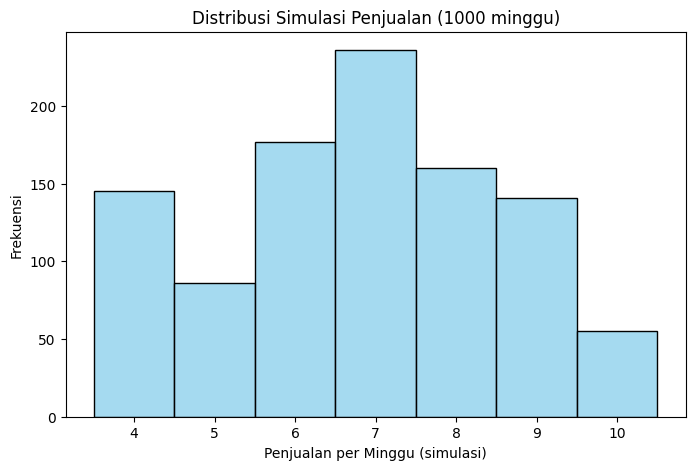

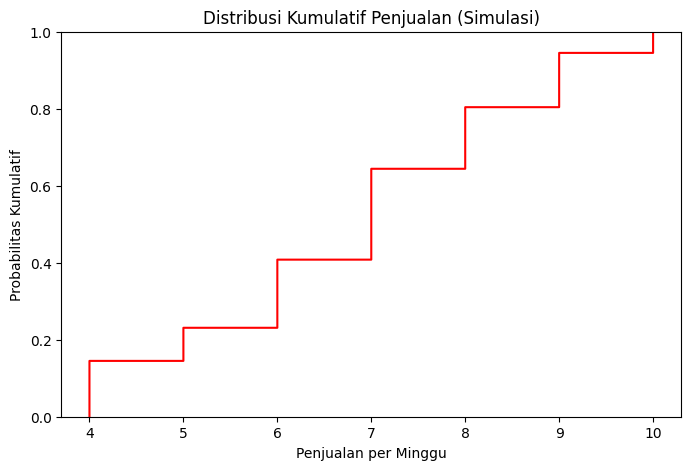

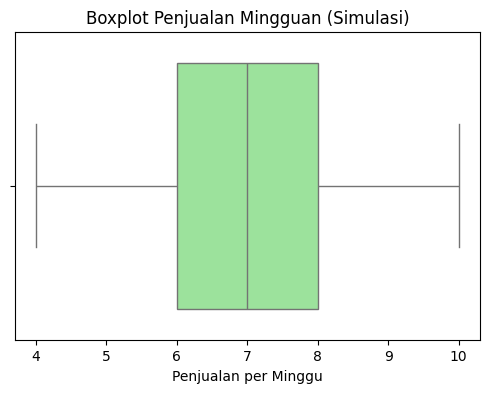

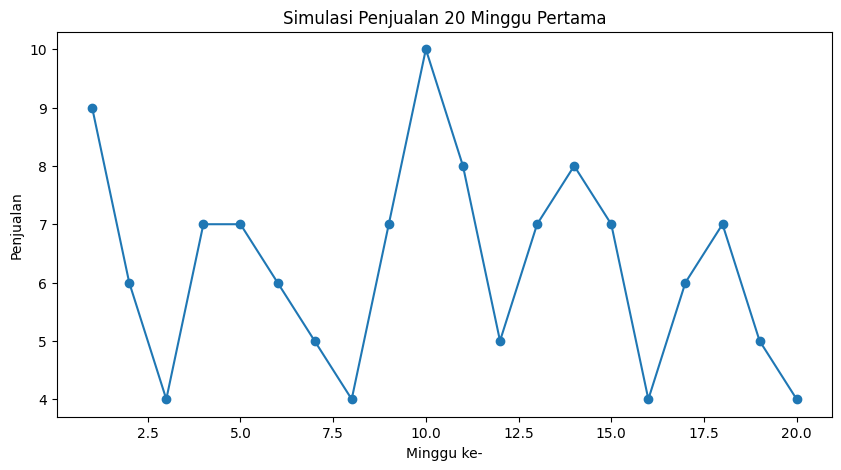

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram hasil simulasi
plt.figure(figsize=(8,5))
sns.histplot(sim, bins=np.arange(3.5, 11.5, 1), kde=False, color="skyblue", edgecolor="black")
plt.xlabel("Penjualan per Minggu (simulasi)")
plt.ylabel("Frekuensi")
plt.title(f"Distribusi Simulasi Penjualan ({N} minggu)")
plt.show()

# Plot distribusi kumulatif simulasi
plt.figure(figsize=(8,5))
sns.ecdfplot(sim, color="red")
plt.xlabel("Penjualan per Minggu")
plt.ylabel("Probabilitas Kumulatif")
plt.title("Distribusi Kumulatif Penjualan (Simulasi)")
plt.show()

# Boxplot untuk sebaran
plt.figure(figsize=(6,4))
sns.boxplot(x=sim, color="lightgreen")
plt.xlabel("Penjualan per Minggu")
plt.title("Boxplot Penjualan Mingguan (Simulasi)")
plt.show()

# Simulasi time series 20 minggu (contoh urut)
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), simulasi[:20], marker="o")
plt.xlabel("Minggu ke-")
plt.ylabel("Penjualan")
plt.title("Simulasi Penjualan 20 Minggu Pertama")
plt.show()


Penjelasan :
*  Simulasi: Kita mensimulasikan 1.000 minggu penjualan dengan memetakan bilangan acak ke distribusi historis 4–10 unit.

* Estimasi: Rata-rata penjualan mingguan simulasi ≈ 6,7 unit dengan variasi sekitar ±1,5 unit.

* Evaluasi: Sebagian besar (90%) penjualan mingguan jatuh pada rentang 5–9 unit sesuai distribusi historis.

* Visualisasi: Histogram, ECDF, boxplot, dan time series memperlihatkan pola penjualan dominan di 6–7 unit dengan fluktuasi realistis.

* Hasil Tipikal: Estimasi rata-rata stabil, interval prediksi 95% ≈ [5, 9] unit, dan contoh prediksi minggu ke-20 adalah 7 unit.